___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project - Joshua Zimmerman 

## Summary of Project:

Step 1: Read in the data from a csv file.

Step 2: Performed limited data exploration. This was due to the data being anatomized/classified.

Step 3: Standardized the variables using Sklearn's standard scaler.

Step 4: Transformed into the scaled features.

Step 5: Used the transformed features in a Train Test Split with Sklearn's cross validation.

Step 6: Used KNeighborsClassifier from scikit to build my classifer.

Step 7: Started with a low K value, analyzed predictions with a confusion matrix and classification report.

Step 8: Used a for loop to choose a K value by doing the elbow method to choose a good k value.

Step 9: Choose a resonable K value and retrained the model. Confirmed the improved results.




## Import Libraries


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline



** Read the 'KNN_Project_Data csv file into a dataframe **

In [14]:
df = pd.read_csv('KNN_Project_Data')

**Checked the head of the dataframe.**

In [57]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# View Data

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Used seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

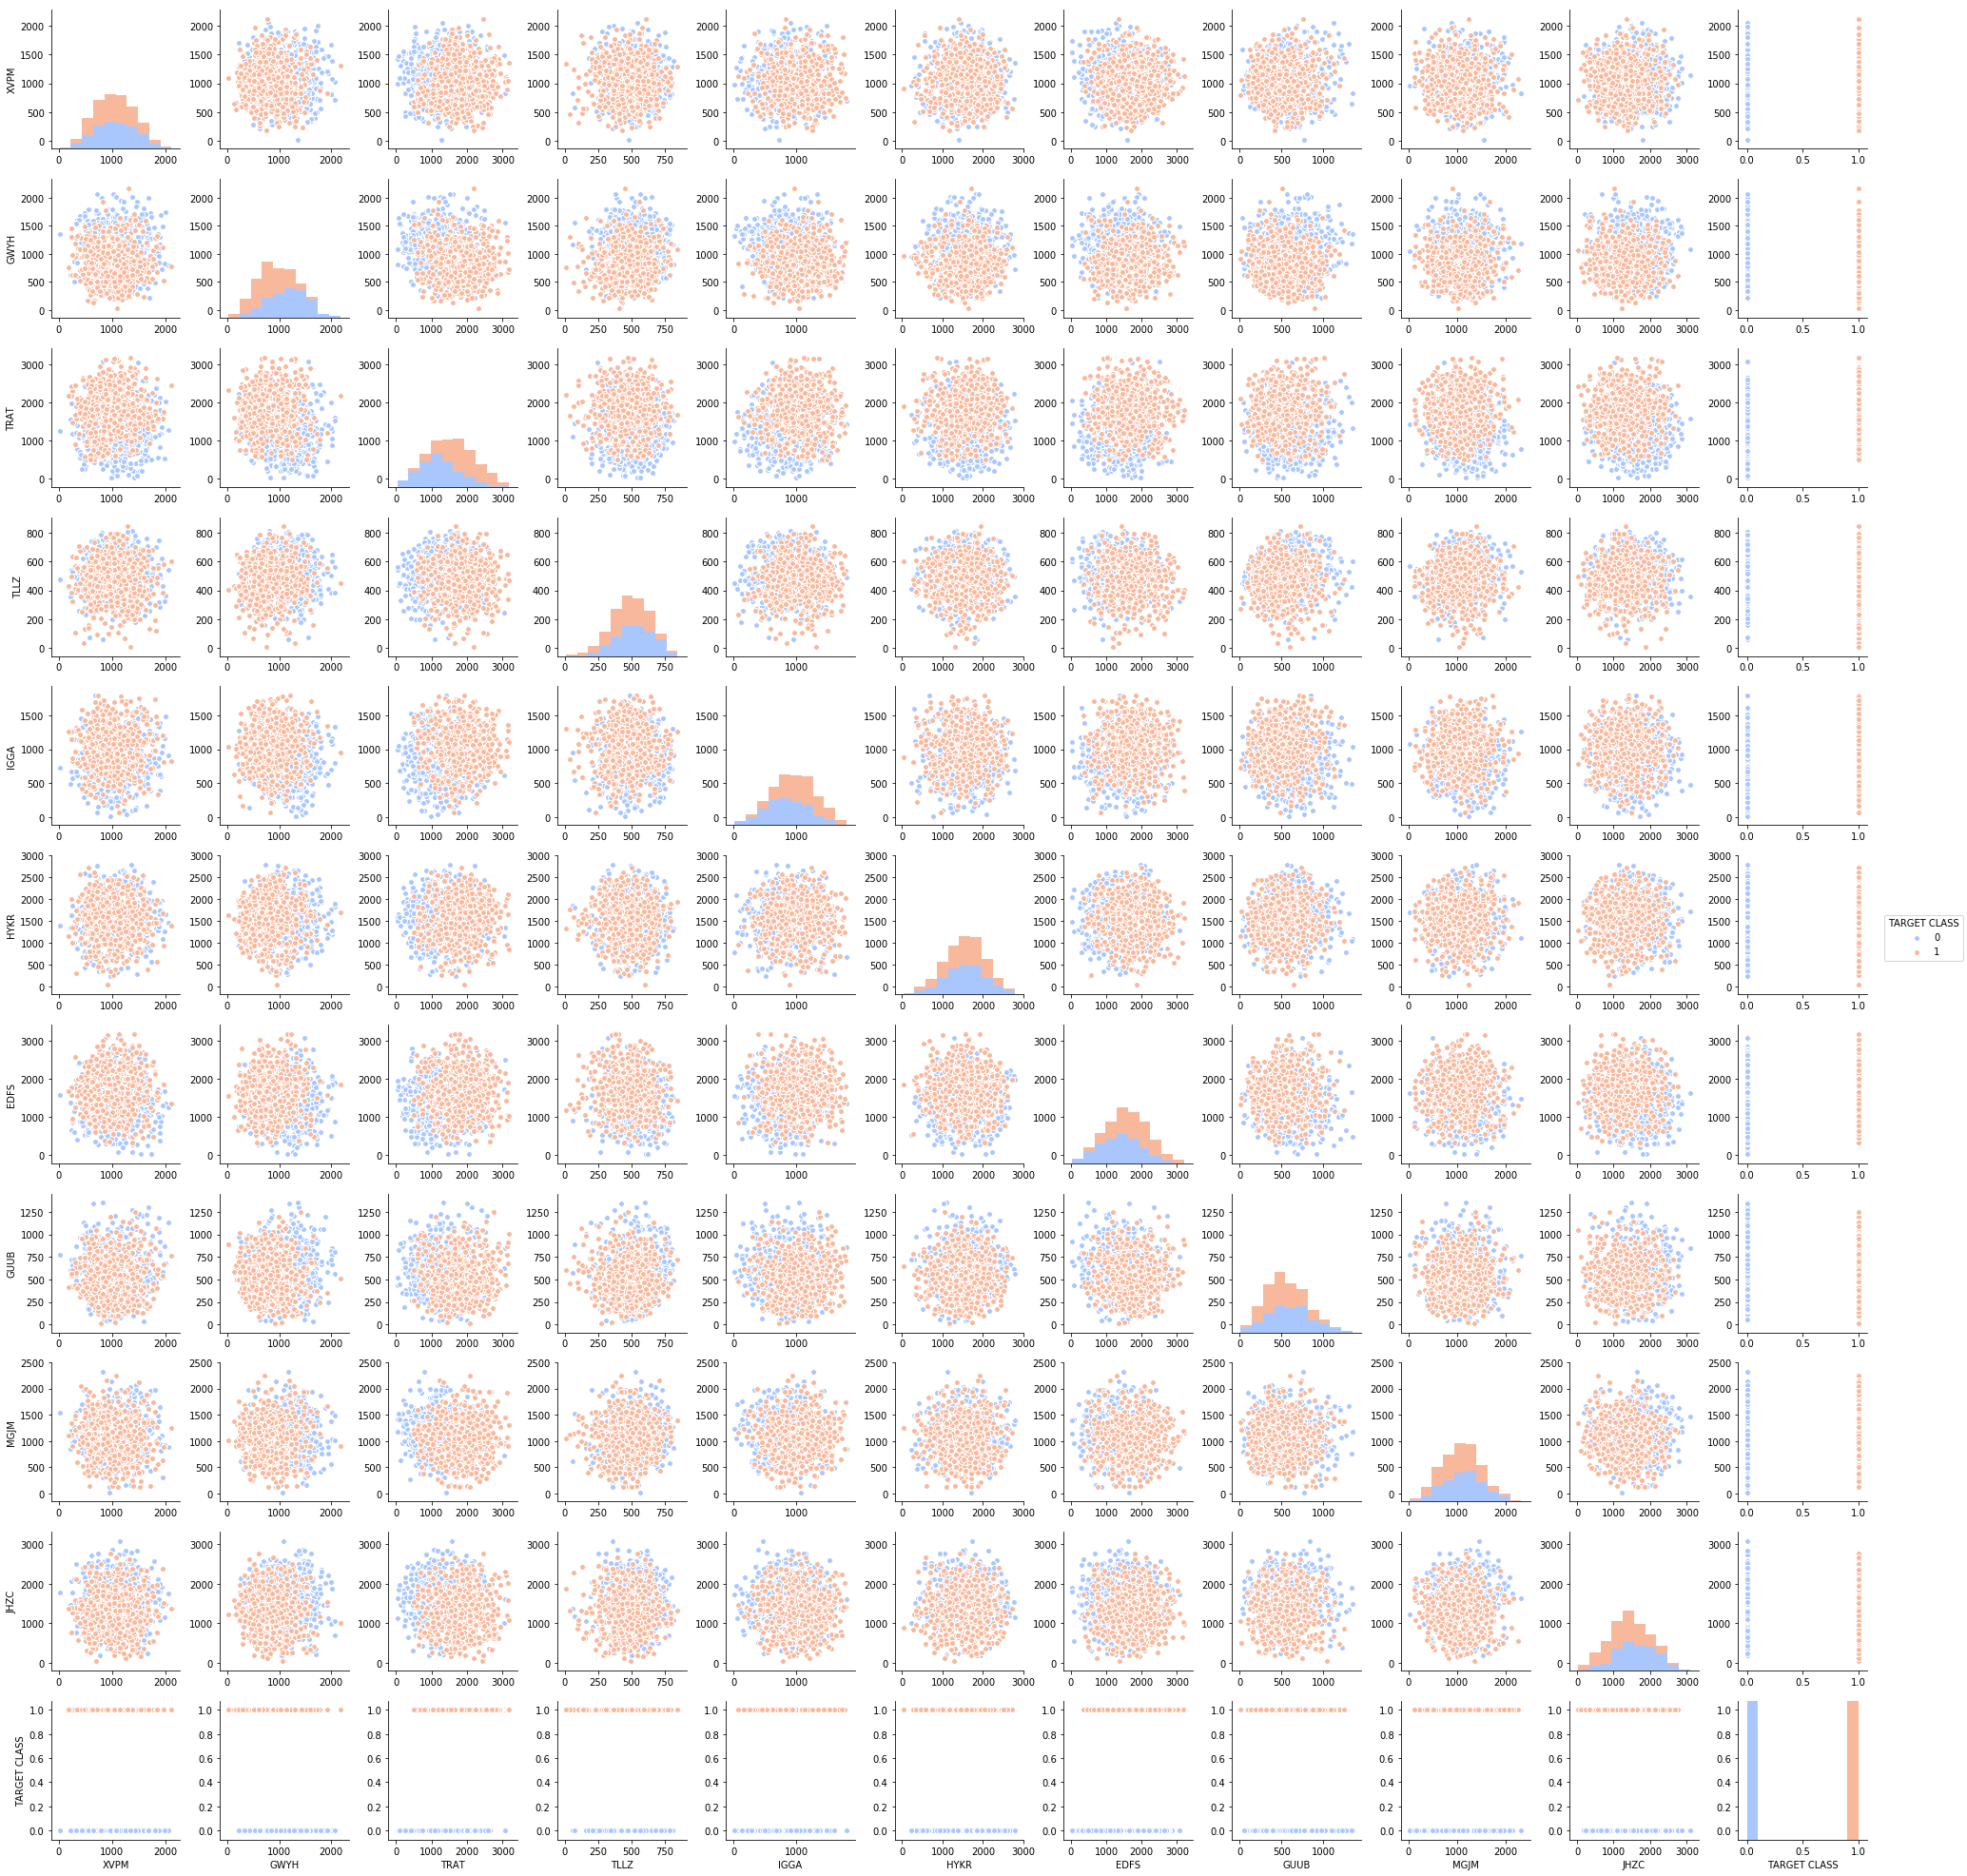

In [7]:
sns.pairplot(df,hue='TARGET CLASS', palette='coolwarm')

# Standardize the Variables



** Import StandardScaler from Scikit learn.**

In [8]:
from sklearn.preprocessing import StandardScaler

** Created a StandardScaler() object called scaler.**

In [16]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [17]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Used the .transform() method to transform the features to a scaled version.**

In [18]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

**Converted the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [19]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head(3)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_feat
y = df['TARGET CLASS']

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Using KNN

**Imported KNeighborsClassifier from scikit learn.**

In [27]:
from sklearn.neighbors import KNeighborsClassifier

**Created a KNN model instance with n_neighbors=1**

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Evaluated the KNN model

**Used the predict method to predict values using the KNN model and X_test.**

In [35]:
pred = knn.predict(X_test)

** Created a confusion matrix and classification report.**

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(confusion_matrix(y_test, pred))

[[109  43]
 [ 41 107]]


In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value
Using the elbow method to pick a good K Value.

** Created a for loop that trains various KNN models with different k values, then keeps track of the error_rate for each of these models with a list.

In [52]:
error_rate = []

# Iterate through different k values
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Created the following plot using the information from loop.**

Text(0,0.5,u'Error Rate')

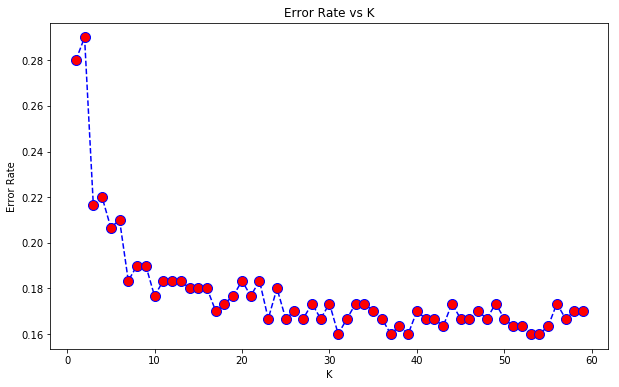

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60), error_rate,color='blue',linestyle='--',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [58]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test,pred))

[[124  28]
 [ 24 124]]


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

   micro avg       0.83      0.83      0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



## Result
Because of choosing the higher K value with a lower error rate, I was able to increase my precision and recall by about 11%. 


## Summary of Project:

Step 1: Read in the data from a csv file.

Step 2: Performed limited data exploration. This was due to the data being anatomized/classified.

Step 3: Standardized the variables using Sklearn's standard scaler.

Step 4: Transformed into the scaled features.

Step 5: Used the transformed features in a Train Test Split with Sklearn's cross validation.

Step 6: Used KNeighborsClassifier from scikit to build my classifer.

Step 7: Started with a low K value, analyzed predictions with a confusion matrix and classification report.

Step 8: Used a for loop to choose a K value by doing the elbow method to choose a good k value.

Step 9: Choose a resonable K value and retrained the model. Confirmed the improved results.
